In [1]:
import gc
from collections import defaultdict
from itertools import combinations

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from nilearn.image import get_data, load_img, math_img, new_img_like
from nilearn.plotting import plot_roi, plot_stat_map
from scipy.ndimage import label

from survey_medley_code.config_loader import load_config

In [2]:
cfg = load_config()

In [3]:
outdir = cfg.output_root / 'within_subject_question_estimates'

paired_outdir = outdir / 'all_paired_t_tests'

In [4]:
questionnaire_names = ['brief', 'future_time', 'grit', 'impulsive_venture', 'upps']

question_pmaps = {}
question_tmaps = {}

for qa, qb in combinations(questionnaire_names, 2):
    pairing_name = f'{qa}_minus_{qb}'
    paired_pmap_loop = (
        paired_outdir
        / f'paired_test_{pairing_name}/onesample_2sided_tfce_corrp_fstat1.nii.gz'
    )
    paired_t_loop = (
        paired_outdir / f'paired_test_{pairing_name}/uncorrected_tstat1.nii.gz'
    )

    question_pmaps[pairing_name] = paired_pmap_loop
    question_tmaps[pairing_name] = paired_t_loop

### Bonferroni correct for the 10 tests

/tmp/ipykernel_228962/687938255.py:32: UserWarning: empty mask
  display = plot_stat_map(


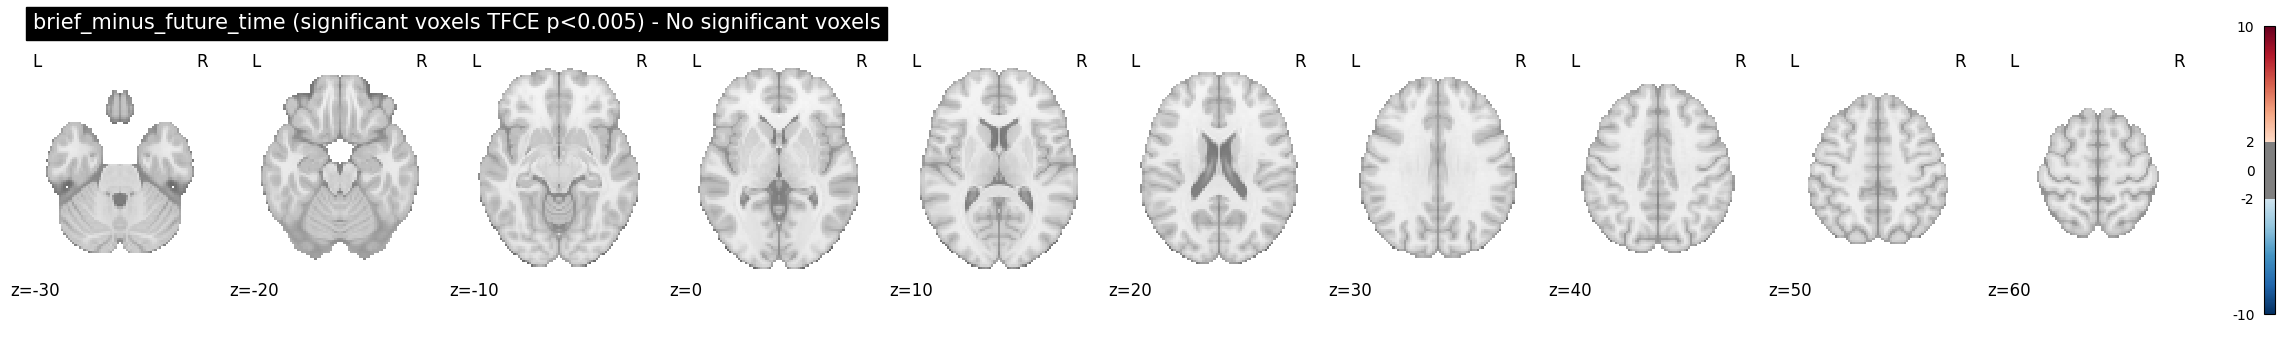

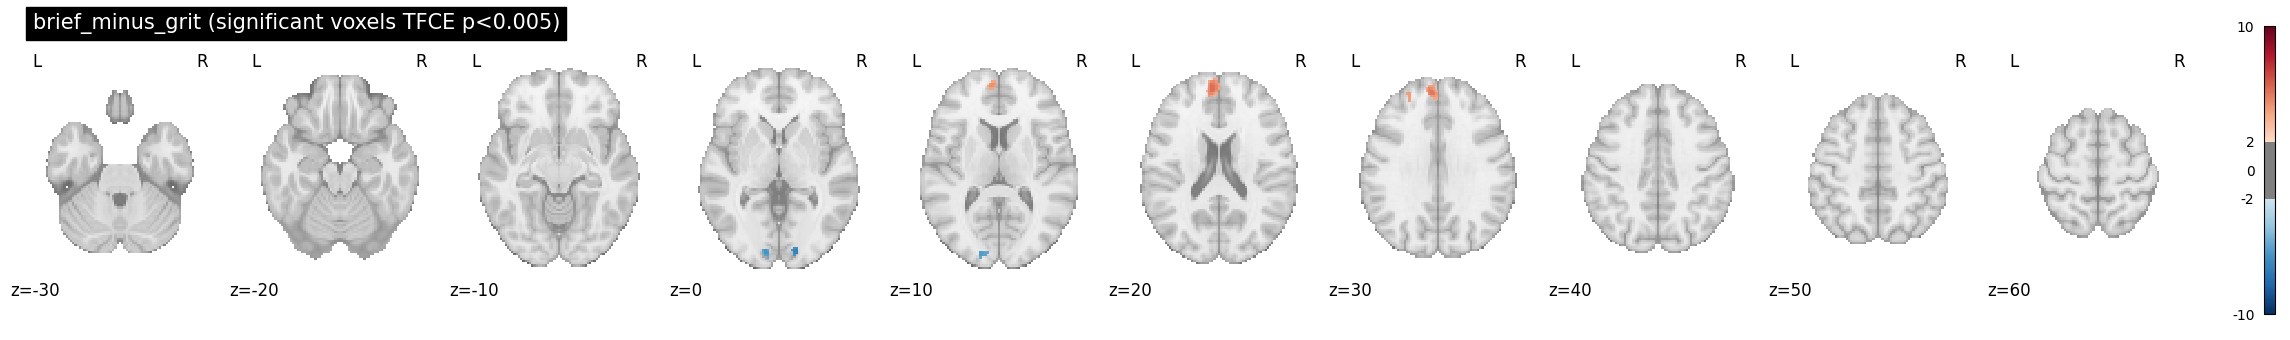

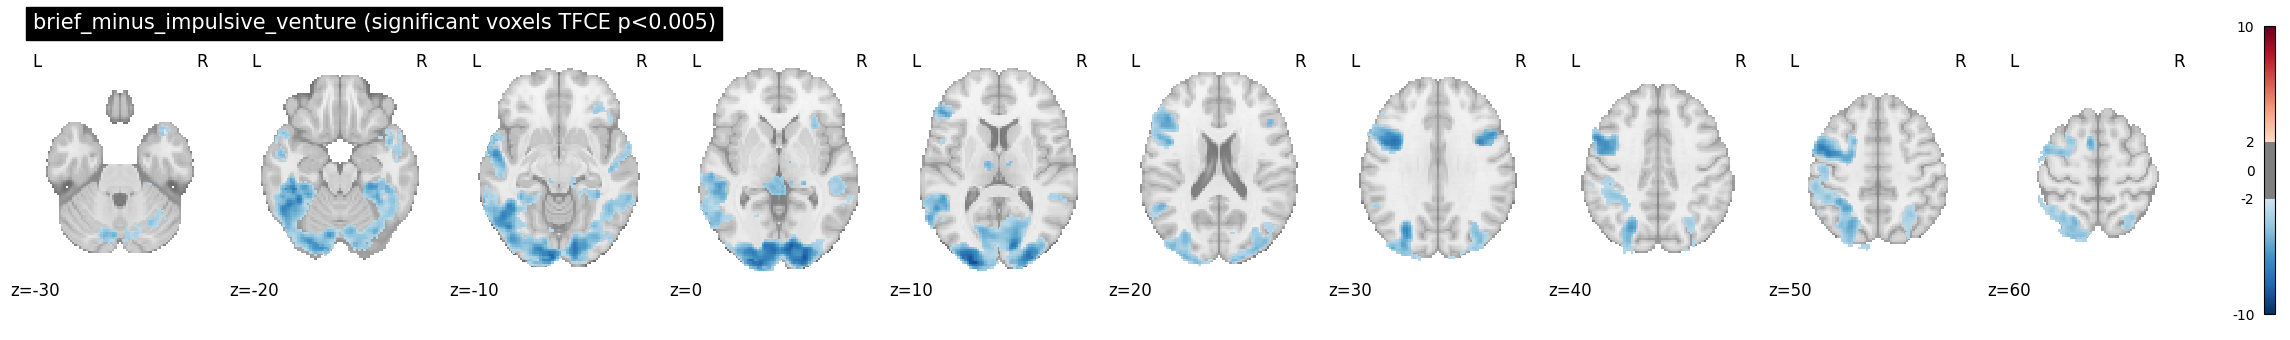

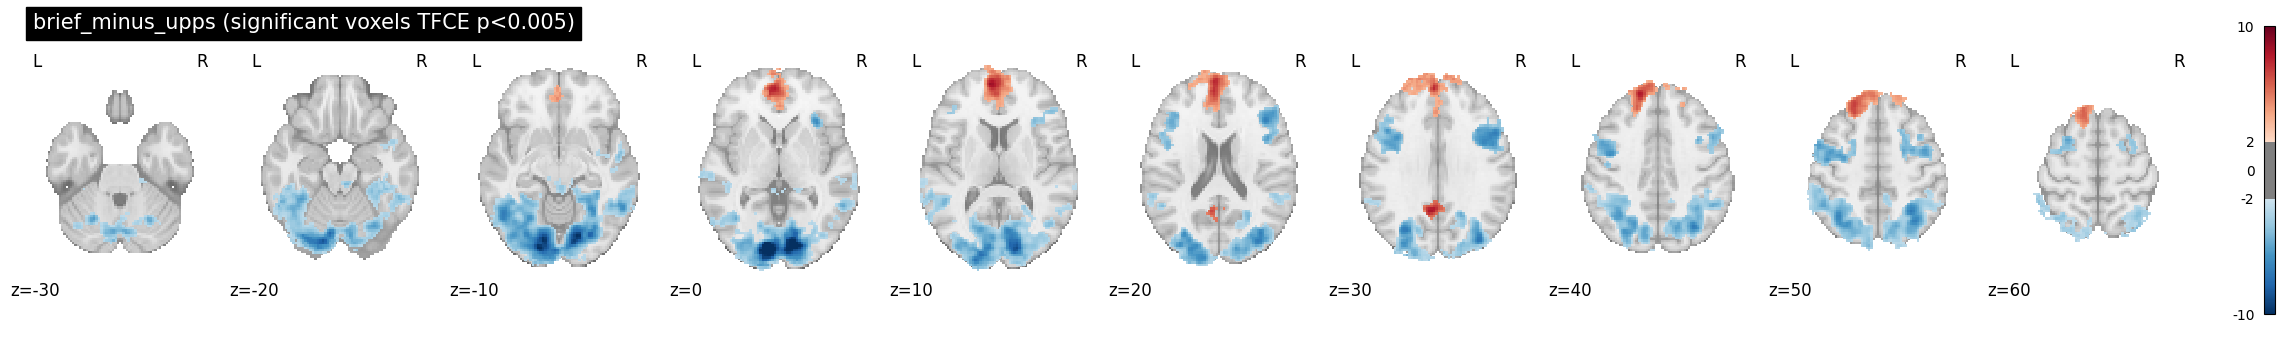

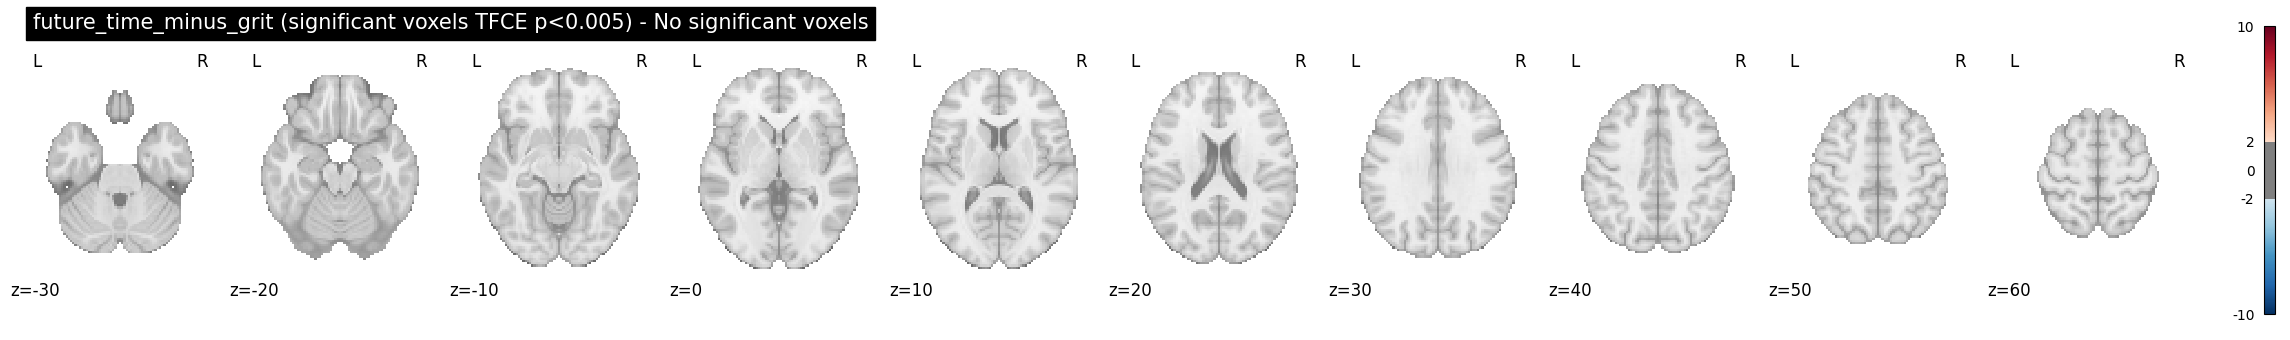

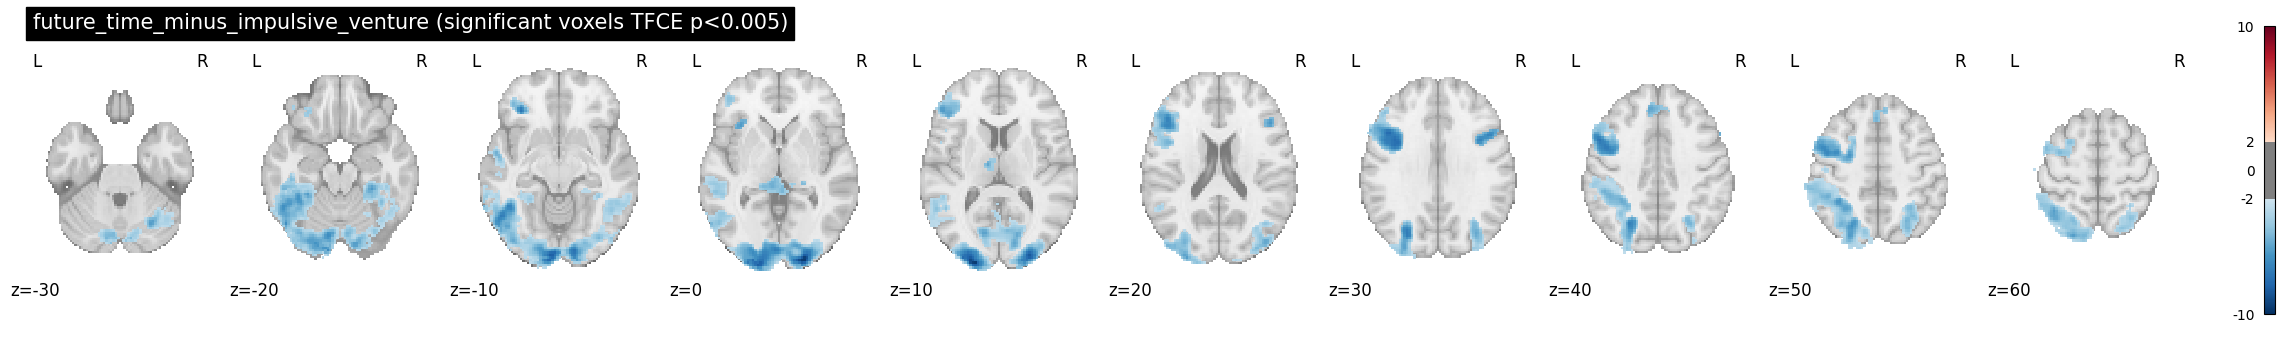

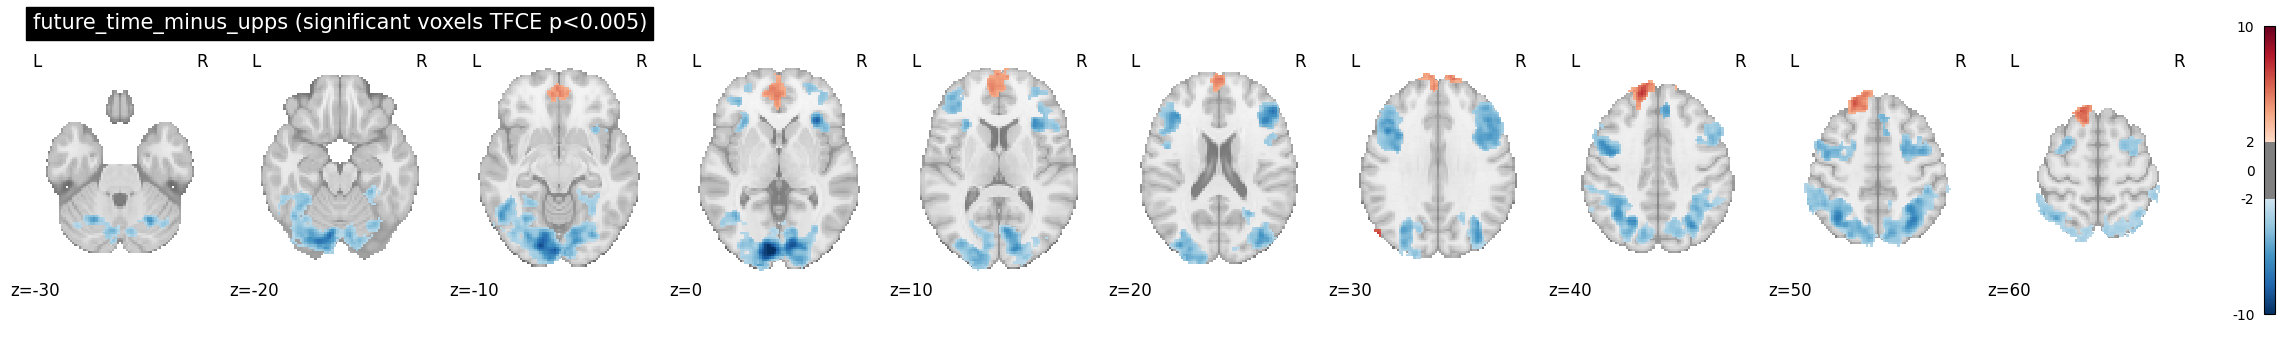

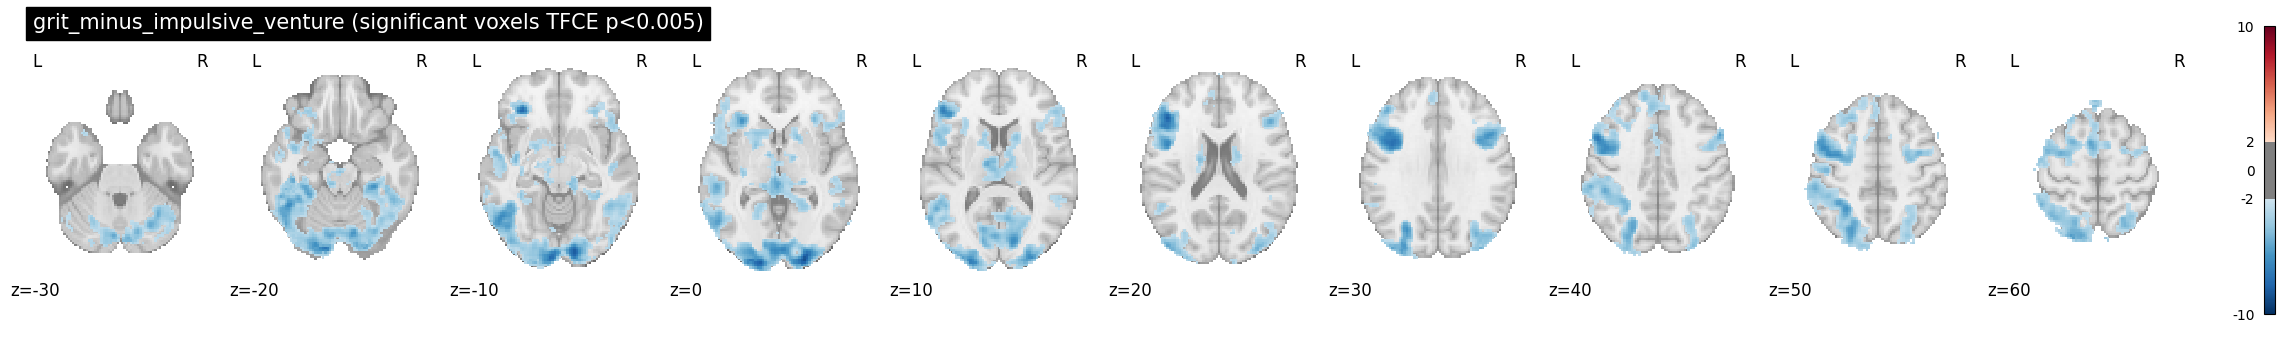

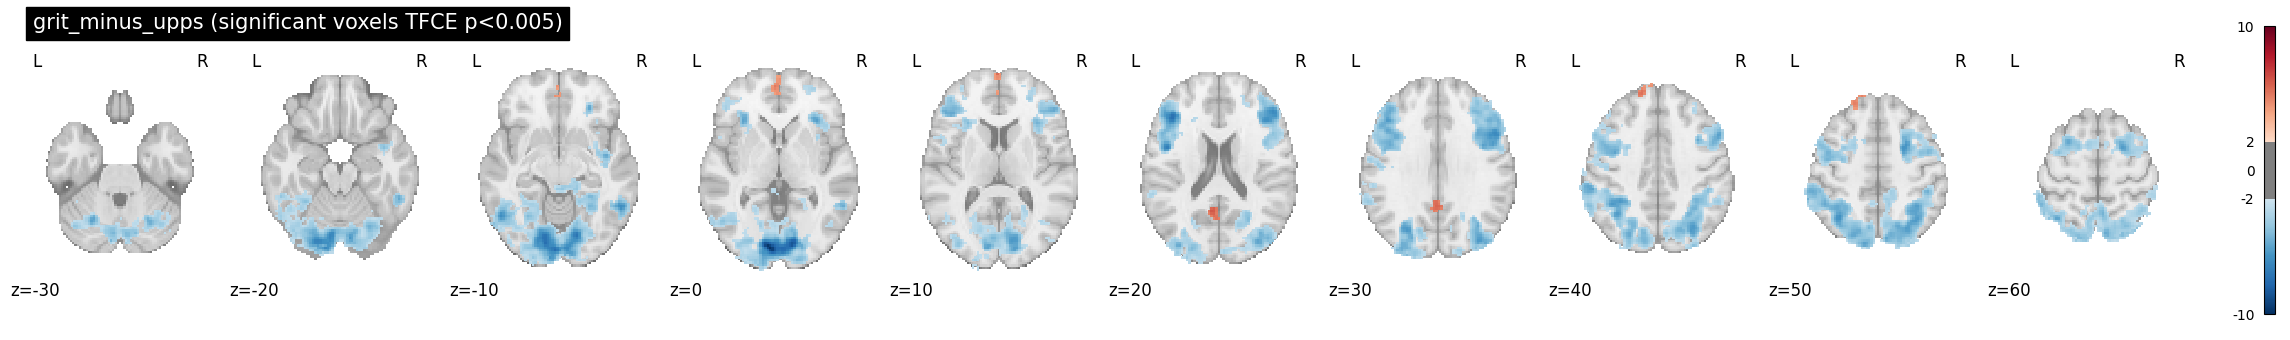

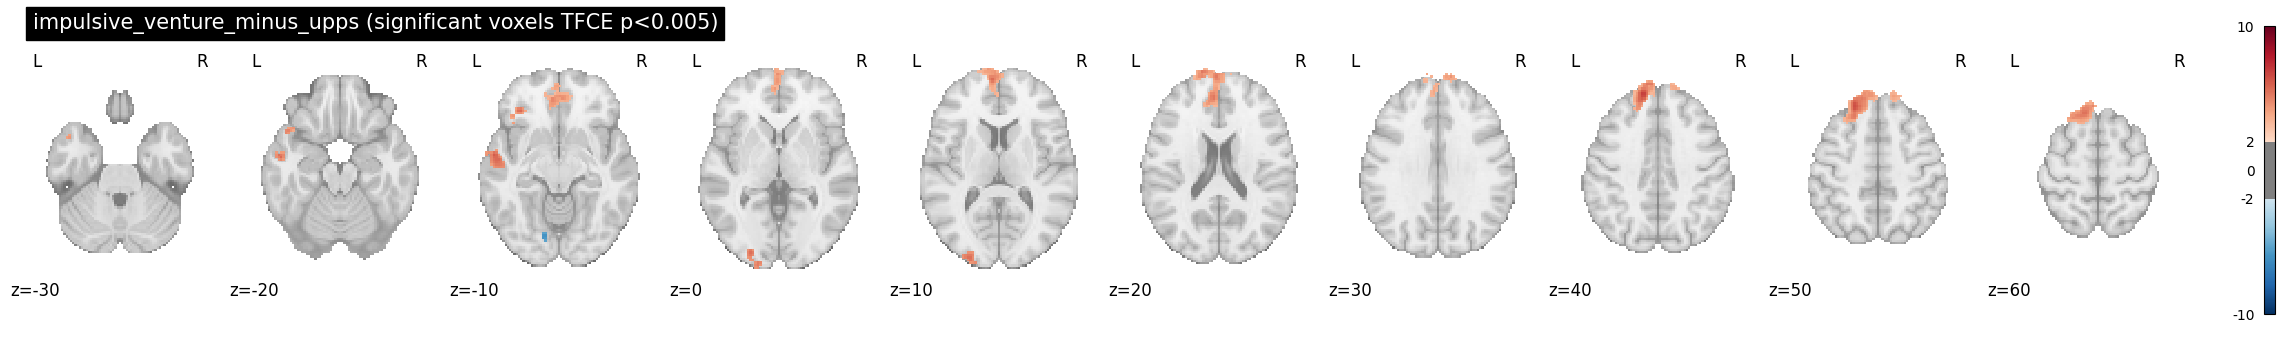

In [5]:
bon_thresh = 1 - (0.005)

binary_paired_maps = {}
z_slices = list(range(-30, 61, 10))

for map_label, map in question_pmaps.items():
    tmap = load_img(question_tmaps[map_label])
    pmap = load_img(map)
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Create positive and negative binary maps
    pos_binary = math_img('img > 0', img=img)
    neg_binary = math_img('img < 0', img=img)

    pos_key = map_label.replace('_minus_', ' > ')
    binary_paired_maps[pos_key] = pos_binary

    # Negative map
    neg_key = map_label.replace('_minus_', ' < ')
    binary_paired_maps[neg_key] = neg_binary

    # Prepare the title
    title = f'{map_label} (significant voxels TFCE p<{1 - bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()

### Don't Bonferroni correct for 10 tests

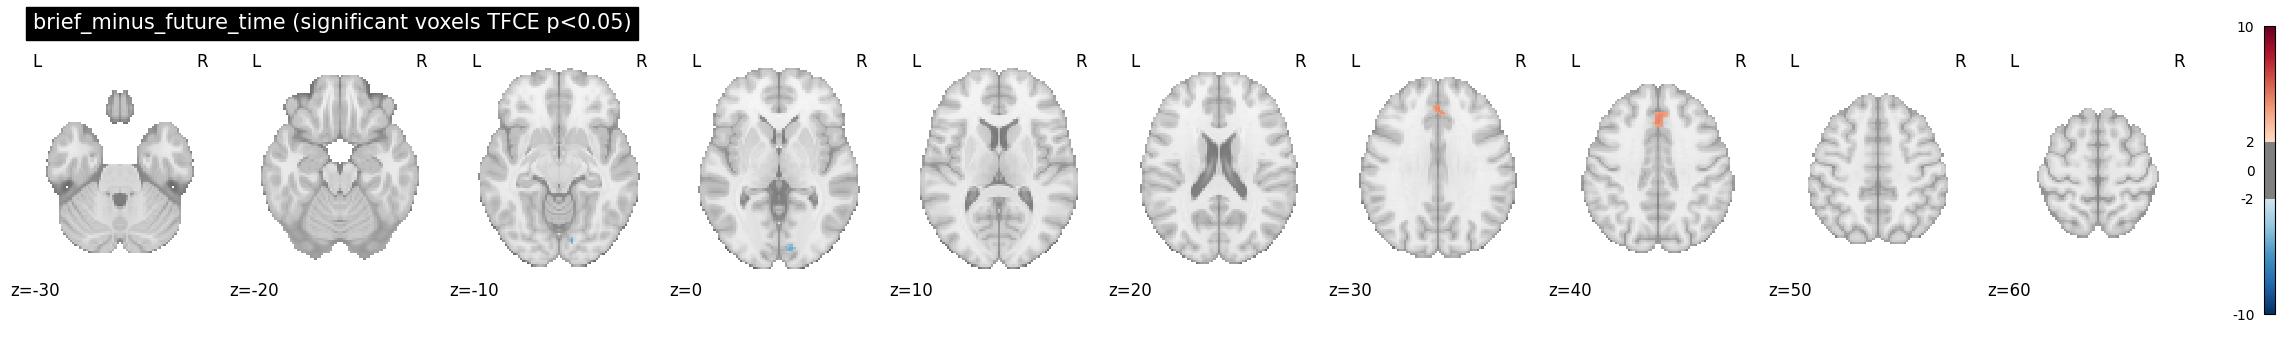

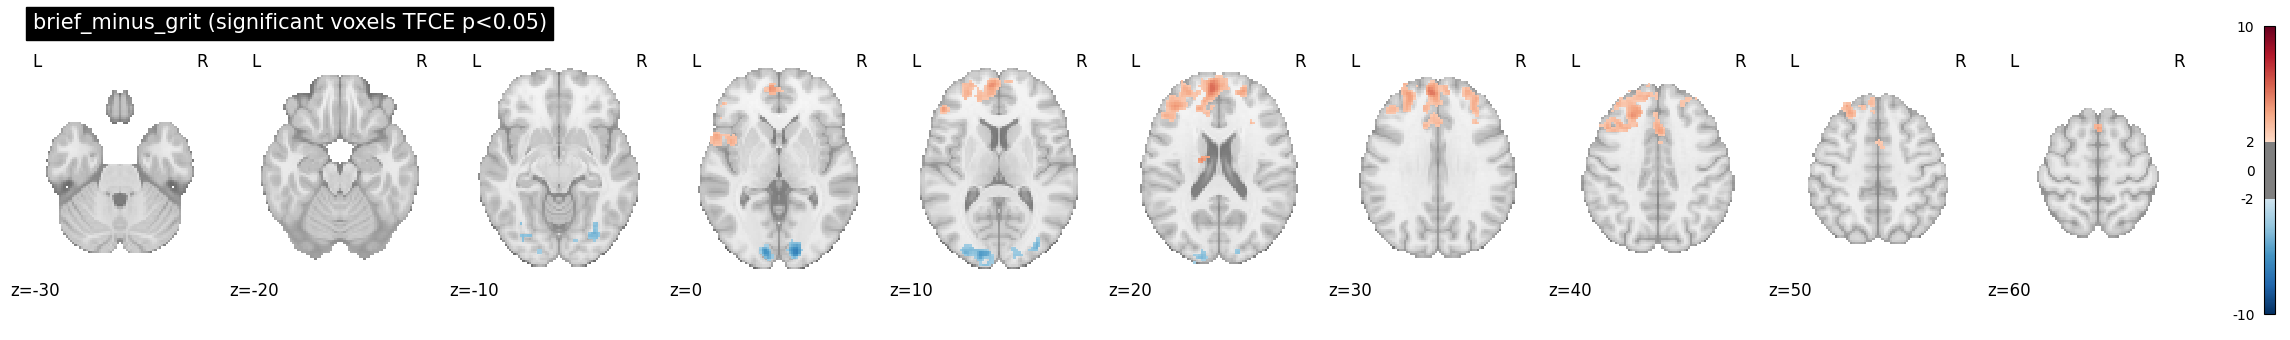

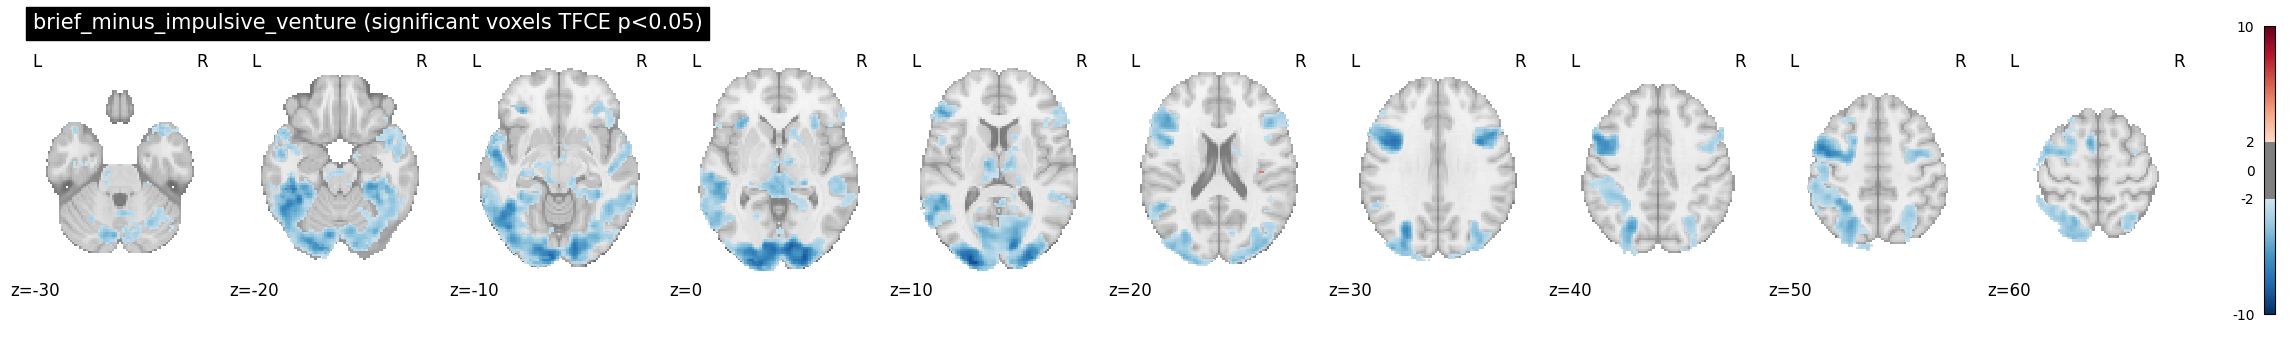

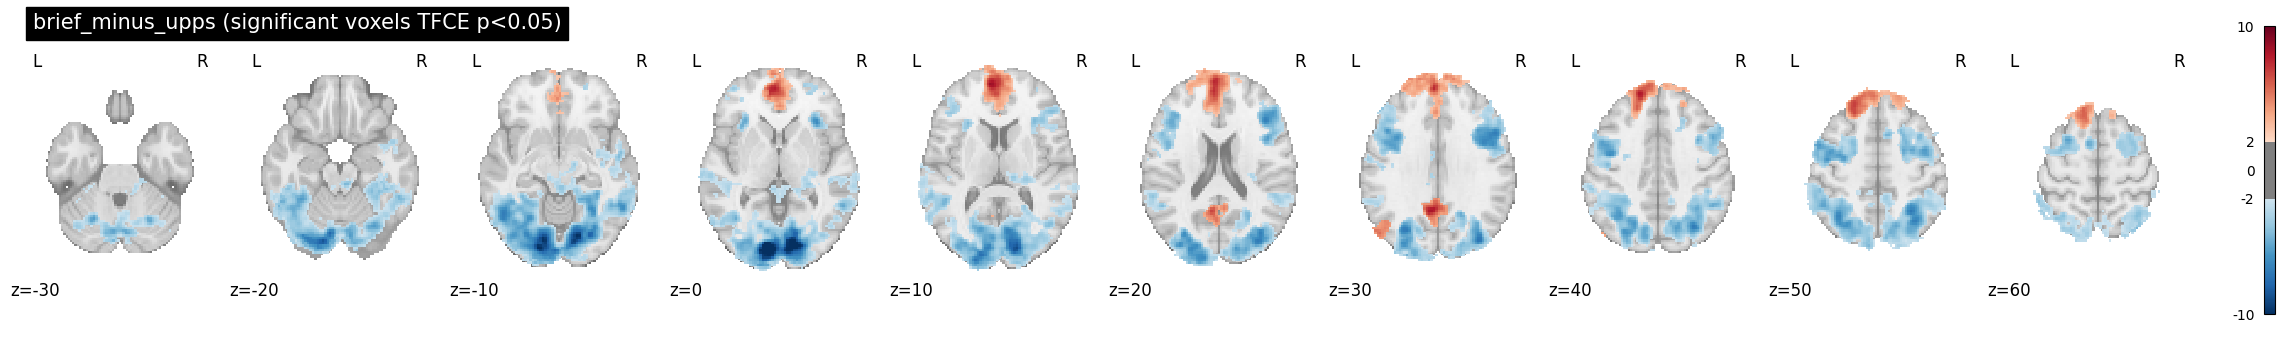

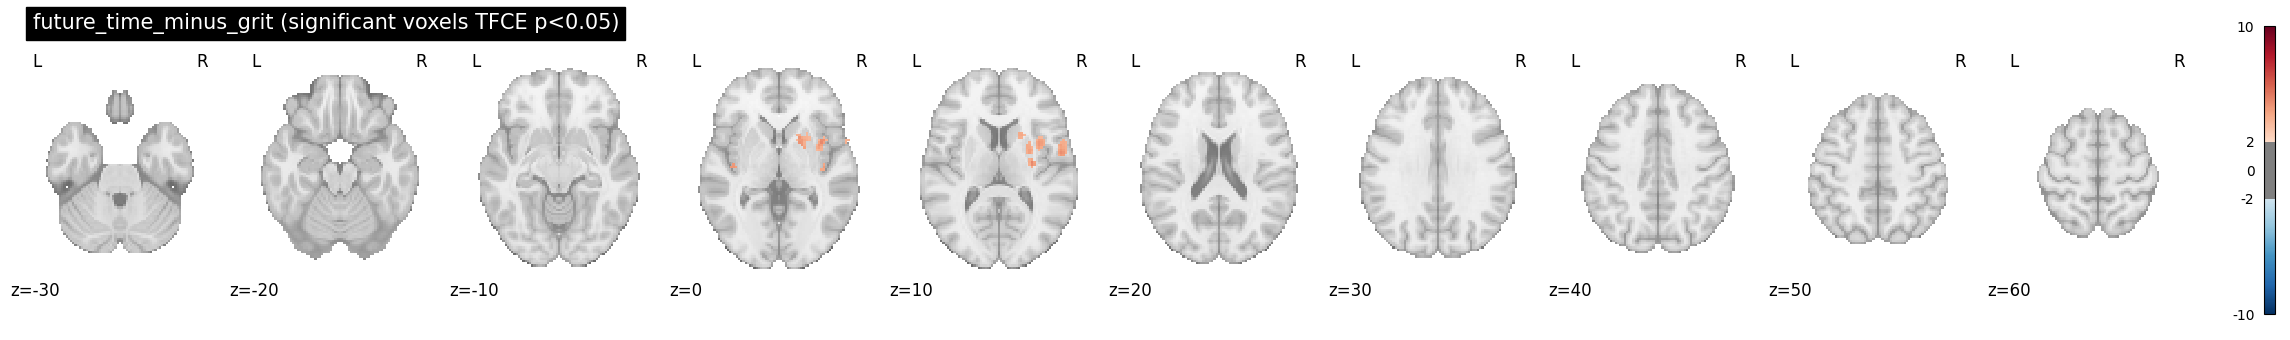

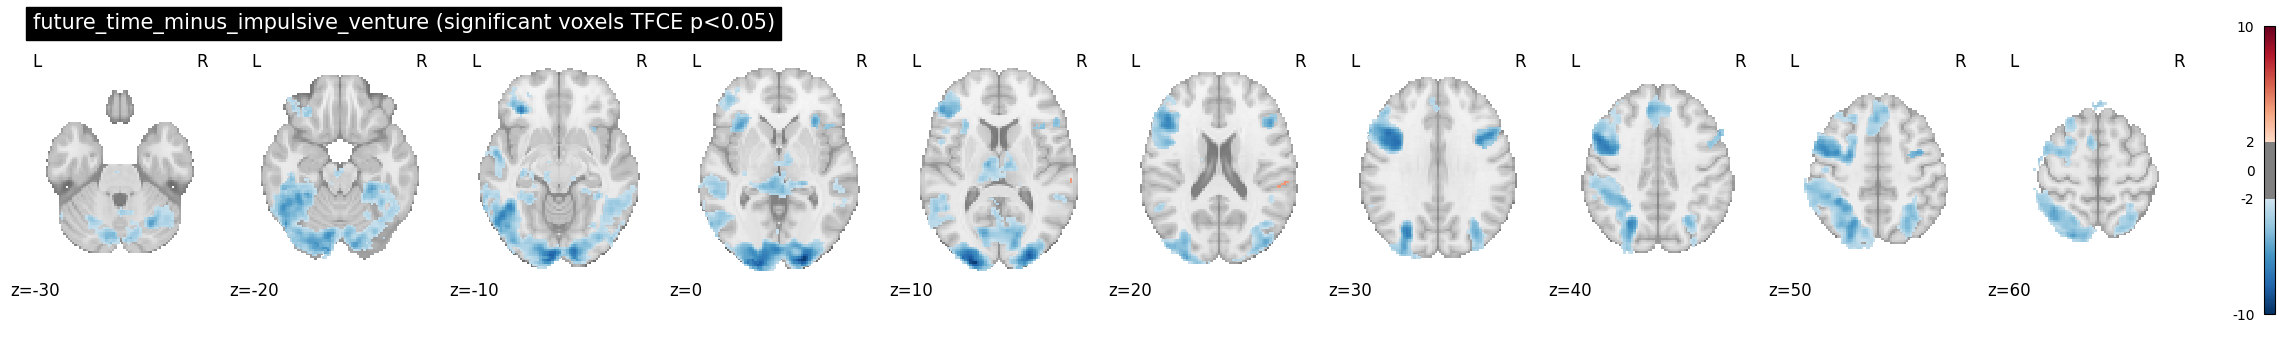

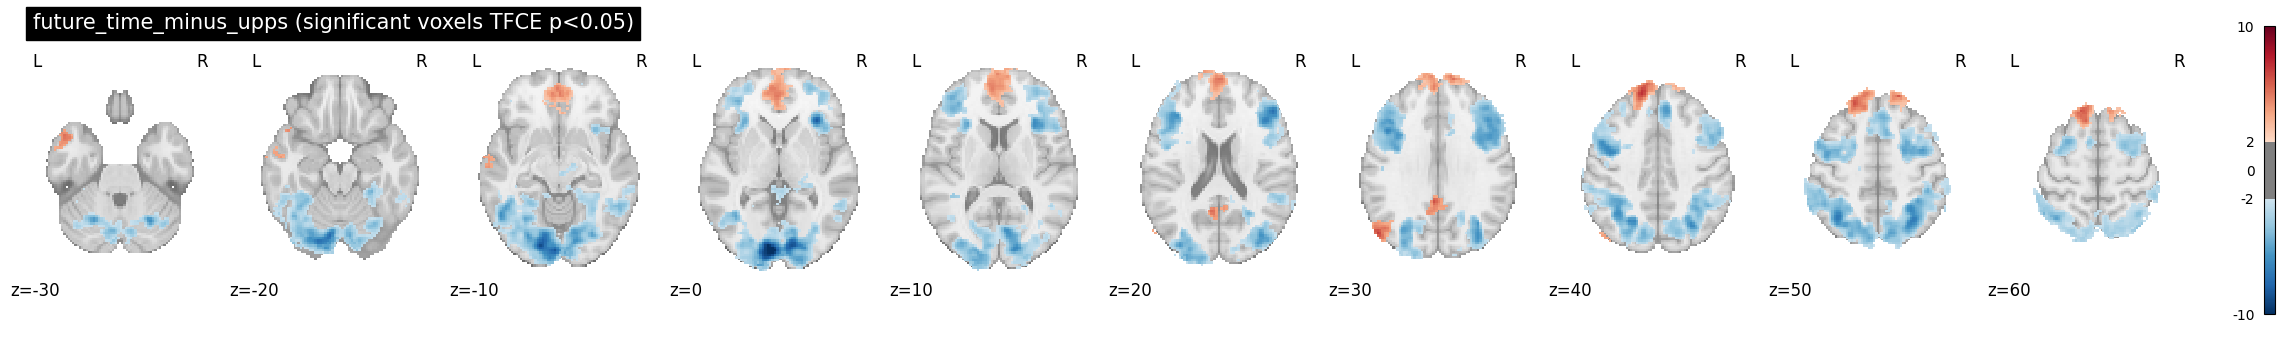

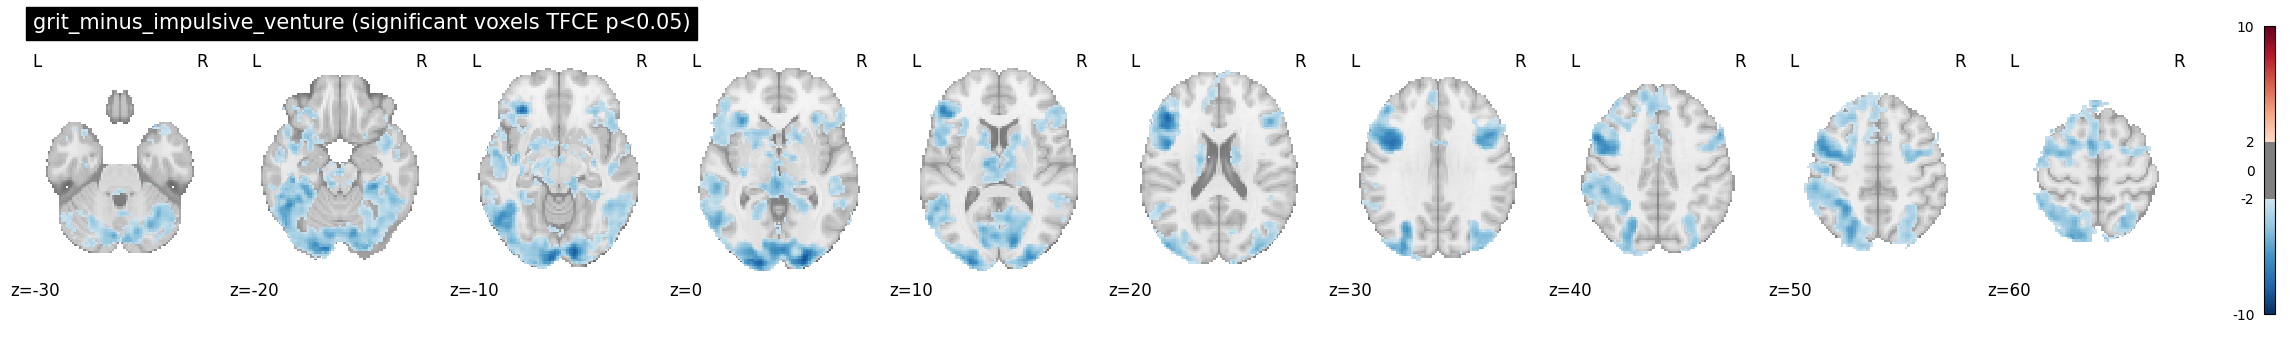

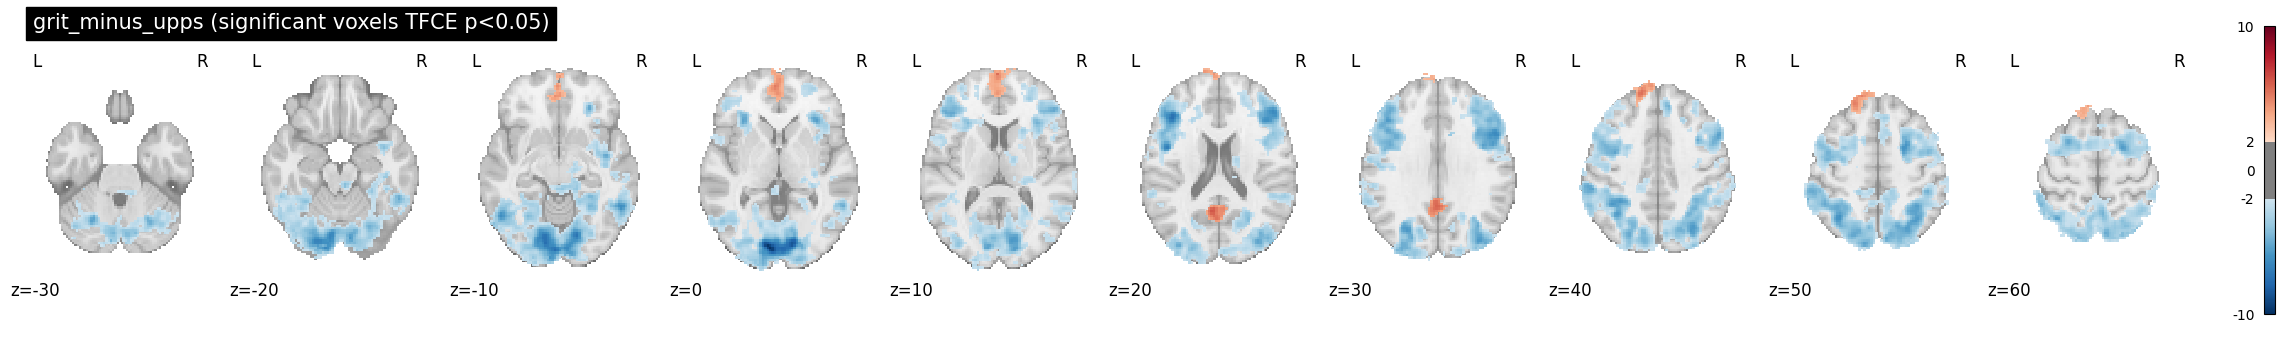

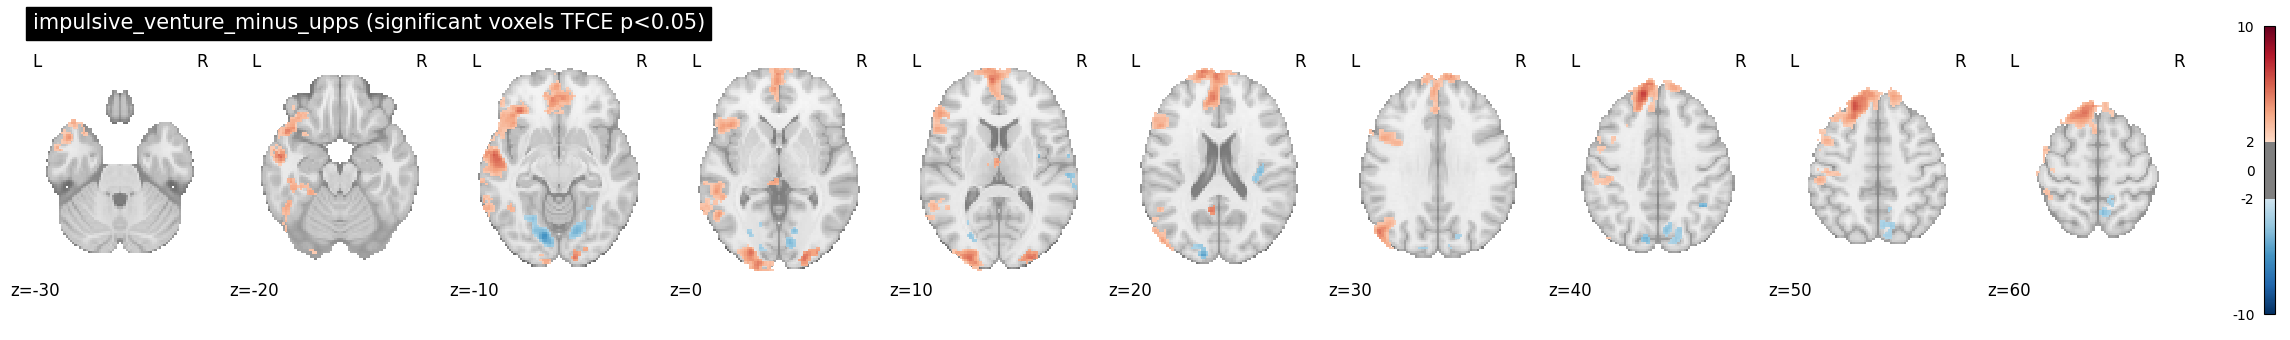

In [6]:
not_bon_thresh = 1 - (0.05)

binary_paired_maps = {}
z_slices = list(range(-30, 61, 10))

for map_label, map in question_pmaps.items():
    tmap = load_img(question_tmaps[map_label])
    pmap = load_img(map)
    # Threshold and binarize pmap at 0.95, then multiply by fmap
    img = math_img(f'img_t * (img_p > {not_bon_thresh})', img_t=tmap, img_p=pmap)

    # Check if there are any significant voxels
    img_data = get_data(img)
    has_sig_voxels = np.any(img_data != 0)

    # Create positive and negative binary maps
    pos_binary = math_img('img > 0', img=img)
    neg_binary = math_img('img < 0', img=img)

    pos_key = map_label.replace('_minus_', ' > ')
    binary_paired_maps[pos_key] = pos_binary

    # Negative map
    neg_key = map_label.replace('_minus_', ' < ')
    binary_paired_maps[neg_key] = neg_binary

    # Prepare the title
    title = f'{map_label} (significant voxels TFCE p<{1 - not_bon_thresh:.3})'
    if not has_sig_voxels:
        title += ' - No significant voxels'

    display = plot_stat_map(
        img,
        threshold=2,
        display_mode='z',
        cut_coords=z_slices,
        colorbar=True,
        title=title,
        symmetric_cbar=True,
        vmax=10,
    )
    plt.show()
    display.close()